Basic model

In [ ]:
import torch.nn as nn
model=nn.Sequential(
            nn.Linear(in_features=784,out_features=256),
            nn.ReLU(),
            nn.Linear(in_features=256,out_features=10),
            nn.LogSoftmax(dim=1)
        )
import torch.optim as optim
optimizer=optim.SGD(
    model.parameters(),
    lr=0.01
)
criterion = nn.CrossEntropyLoss()

Load Dataset

In [17]:
from torchvision.datasets import MNIST
from torchvision import transforms
from torch.utils.data import DataLoader

transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = MNIST(root='./data', train=False, download=True, transform=transform)
batch_size=100
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

Training

In [18]:
import torch
num_epochs = 25
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
for epoch in range(num_epochs):
    running_loss = 0.0
    for images, labels in train_loader:
        images = images.view(images.size(0), -1)
        optimizer.zero_grad()
        images = images.to(device)
        labels = labels.to(device)
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item()
    
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader):.4f}')

Epoch [1/25], Loss: 0.0884
Epoch [2/25], Loss: 0.0865
Epoch [3/25], Loss: 0.0846
Epoch [4/25], Loss: 0.0829
Epoch [5/25], Loss: 0.0811
Epoch [6/25], Loss: 0.0796
Epoch [7/25], Loss: 0.0778
Epoch [8/25], Loss: 0.0766
Epoch [9/25], Loss: 0.0750
Epoch [10/25], Loss: 0.0737
Epoch [11/25], Loss: 0.0722
Epoch [12/25], Loss: 0.0709
Epoch [13/25], Loss: 0.0696
Epoch [14/25], Loss: 0.0685
Epoch [15/25], Loss: 0.0672
Epoch [16/25], Loss: 0.0660
Epoch [17/25], Loss: 0.0648
Epoch [18/25], Loss: 0.0638
Epoch [19/25], Loss: 0.0625
Epoch [20/25], Loss: 0.0616
Epoch [21/25], Loss: 0.0608
Epoch [22/25], Loss: 0.0598
Epoch [23/25], Loss: 0.0588
Epoch [24/25], Loss: 0.0576
Epoch [25/25], Loss: 0.0568


Testing

In [22]:

model.eval()
correct = 0
total = 0
with torch.no_grad():  # Disable gradient calculation for not remebering history
    for images, labels in test_loader:
        images=images.to(device)
        labels=labels.to(device)
        images = images.view(images.size(0), -1)
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

accuracy = 100 * correct / total
print(f'Accuracy of the model on the test images: {accuracy:.2f}%')

Accuracy of the model on the test images: 97.58%


saving model

In [23]:
torch.save(model, 'mnist_full.pth')

test single image

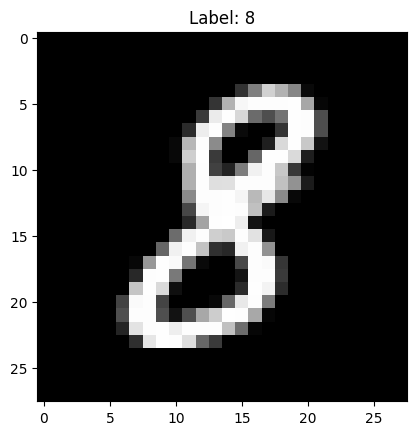

Predicted Label: 8


In [26]:
import matplotlib.pyplot as plt

single_image, single_label = test_dataset[110]

plt.imshow(single_image.squeeze(), cmap='gray')
plt.title(f'Label: {single_label}')
plt.show()

single_image = single_image.view(1, -1).to(device)


model.eval()
with torch.no_grad():
    output = model(single_image)
    _, predicted_label = torch.max(output, 1)

print(f'Predicted Label: {predicted_label.item()}')